## Cleaning and Preprocessing Data


1. Introduction

This notebook handles the data loading, cleaning, and preprocessing for the IBM Telco Customer Churn dataset. Outputs are stored in data/processed/ for downstream analysis.

2. Load libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


3. Create directories for raw and processed data

In [3]:
Path("../data/raw").mkdir(parents=True, exist_ok=True)
Path("../data/processed").mkdir(parents=True, exist_ok=True)

4. Load Data

In [4]:
df = pd.read_csv("../data/raw/Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


5. Initial Inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:

df.describe(include='all')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [7]:
df.shape

(7043, 21)

4. Data Cleaning

a. Handle spaces in column names

In [5]:
df.columns = df.columns.str.strip()

In [23]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [12]:
# df.isnull().sum().plot(kind='bar')
# plt.show()

b. Convert TotalCharges to numeric

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


c. Handle missing values in TotalCharges

In [7]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

d. Remove Extra Spaces in text fields

In [8]:
for col in df.select_dtypes("object"):
    df[col] = df[col].str.strip()


e. Standardize categorical values

In [9]:
df.replace("No internet service", "No", inplace=True)
df.replace("No phone service", "No", inplace=True)

e. Remove Unnecessary Columns

In [10]:
df.drop("customerID", axis=1, inplace=True)

5. Feature Engineering 

In [11]:
# --- Feature Engineering ---
df["charges_ratio"] = df["TotalCharges"] / df["MonthlyCharges"]



In [39]:
print(df["tenure"].min())
print(df["tenure"].max())

0
72


In [14]:
########### Why There Are Missing Values in tenure_group ###########

# When you run:
# df["tenure_group"] = pd.cut(
#     df["tenure"], bins=[0, 12, 24, 48, 72], labels=["0-1yr", "1-2yrs", "2-4yrs", "4-6yrs"]
# )

# Any tenure value outside the bin range (0–72) will become NaN.

# So:

# Customers with tenure = 0 (new customers) are below the first bin (0)

# Customers with tenure > 72 (long-term customers) are above the last bin (72)

# Both end up as missing (NaN) in tenure_group.

##### How to Fix It ########

# You can extend the bin range slightly to include all tenure values in your dataset.
# If you want fixed bins regardless of data range (e.g., for consistency across datasets), 
# just make sure the upper bound is greater than the max.

df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[-1, 12, 24, 48, 72, 80],  # push upper edge slightly higher
    labels=['0-1yr', '1-2yrs', '2-4yrs', '4-6yrs', '6yrs+']
)
df['tenure_group'].isnull().sum()


np.int64(0)

In [18]:
# See the categories
print(df['tenure_group'].cat.categories)

# Or with counts to understand distribution
print(df['tenure_group'].value_counts())

Index(['0-1yr', '1-2yrs', '2-4yrs', '4-6yrs', '6yrs+'], dtype='object')
tenure_group
4-6yrs    2239
0-1yr     2186
2-4yrs    1594
1-2yrs    1024
6yrs+        0
Name: count, dtype: int64


In [19]:
for col in df.select_dtypes('object'):
    print(f"\n{col}: {df[col].unique()}")
    print(df[col].value_counts())


gender: ['Female' 'Male']
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner: ['Yes' 'No']
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents: ['No' 'Yes']
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService: ['No' 'Yes']
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines: ['No' 'Yes']
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

InternetService: ['DSL' 'Fiber optic' 'No']
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity: ['No' 'Yes']
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

OnlineBackup: ['Yes' 'No']
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

DeviceProtection: ['No' 'Yes']
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

TechSupport: ['No' 'Yes']
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

StreamingTV: ['No' 'Yes']
StreamingT

In [20]:
# --- Encoding ---
cat_cols = df.select_dtypes("object").columns.tolist()

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)



In [21]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,charges_ratio,tenure_group,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1.000000,0-1yr,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,33.178227,2-4yrs,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,2.008357,0-1yr,True,False,False,True,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,43.516548,2-4yrs,True,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,2.144979,0-1yr,False,False,False,True,...,False,False,False,False,False,True,False,True,False,True


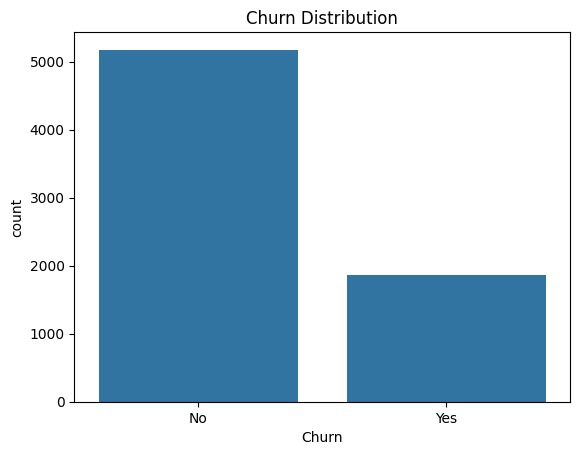

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000000,0.000000,0.000000,1.000000
tenure,7043.0,32.371149,24.559481,0.00,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500000,70.350000,89.850000,118.750000
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225000,1397.475000,3786.600000,8684.800000
charges_ratio,7043.0,32.444432,24.583541,1.00,8.821984,28.837772,55.272674,79.341772


In [22]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

df_encoded.describe().T.head(10)

In [23]:
# --- Save processed file ---
output_path = Path("../data/processed/telco_cleaned.csv")
df_encoded.to_csv(output_path, index=False)


In [24]:

# --- Summary ---
summary = {
    "Original Shape": (4, 21),
    "Cleaned Shape": df_encoded.shape,
    "Missing Values": df.isnull().sum().sum(),
    "Categorical Encoded": len(cat_cols),
}

summary

{'Original Shape': (4, 21),
 'Cleaned Shape': (7043, 26),
 'Missing Values': np.int64(0),
 'Categorical Encoded': 16}

In [25]:
print("Data preprocessing completed successfully.")

Data preprocessing completed successfully.
0
